In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import log_loss
from sklearn.cross_validation import KFold
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline
import math

D:\3kurs1sem\IDEs\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = pd.read_csv(r'd:\3kurs1sem\semestrone\JUPYTER\ResearchIns\Data\gbm-data.csv')

In [3]:
data.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X_data = data.iloc[:,1:].values

In [5]:
y_data = data.iloc[:,0].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_data,y_data,test_size=0.8,random_state=241)

In [7]:
def sigmoid(y_pred):
    # Преобразуйте полученное предсказание с помощью сигмоидной функции по формуле 1 / (1 + e^{−y_pred}),
    # где y_pred — предсказаное значение.
    return 1.0 / (1.0 + math.exp(-y_pred))

In [8]:
def log_loss_results(model, X, y):
    # Используйте метод staged_decision_function для предсказания качества на обучающей и тестовой выборке
    # на каждой итерации.
    results = []
    for pred in model.staged_decision_function(X):
        results.append(log_loss(y, [sigmoid(y_pred) for y_pred in pred]))

    return results

In [9]:
def plot_loss(learning_rate, test_loss, train_loss):
    # Вычислите и постройте график значений log-loss (которую можно посчитать с помощью функции
    # sklearn.metrics.log_loss) на обучающей и тестовой выборках, а также найдите минимальное значение метрики и
    # номер итерации, на которой оно достигается.
    plt.figure()
    plt.plot(test_loss, 'r', linewidth=2)
    plt.plot(train_loss, 'g', linewidth=2)
    plt.legend(['test', 'train'])


    min_loss_value = min(test_loss)
    min_loss_index = test_loss.index(min_loss_value)
    return min_loss_value, min_loss_index

      Iter       Train Loss   Remaining Time 
         1           1.0190           55.14s
         2           0.9192           55.23s
         3           0.8272           56.21s
         4           0.7834            1.00m
         5           0.7109            1.05m
         6           0.6368            1.08m
         7           0.5797            1.04m
         8           0.5610           59.62s
         9           0.5185           57.92s
        10           0.4984           57.84s
        20           0.1999           49.63s
        30           0.1313           44.28s
        40           0.0790           40.92s
        50           0.0511           38.09s
        60           0.0352           35.75s
        70           0.0245           33.43s
        80           0.0162           31.36s
        90           0.0114           29.33s
       100           0.0077           27.49s
       200           0.0004            8.56s
      Iter       Train Loss   Remaining Time 
        

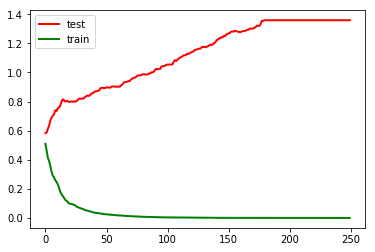

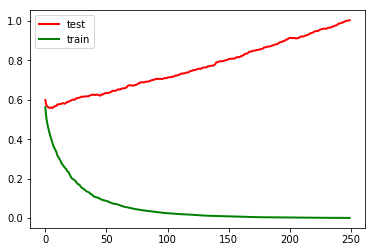

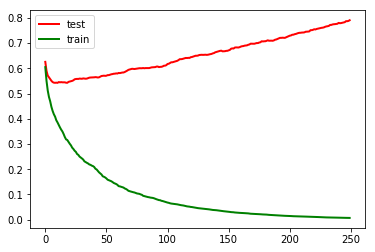

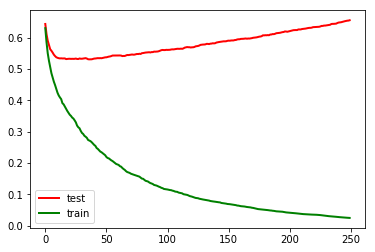

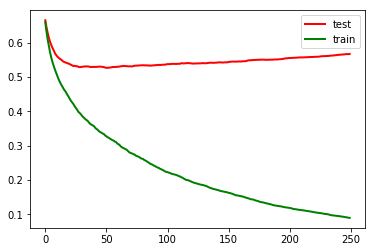

In [10]:
def model_test(learning_rate):
    model = GradientBoostingClassifier(learning_rate=learning_rate, n_estimators=250, verbose=True, random_state=241)
    model.fit(X_train, y_train)

    train_loss = log_loss_results(model, X_train, y_train)
    test_loss = log_loss_results(model, X_test, y_test)
    return plot_loss(learning_rate, test_loss, train_loss)

min_loss_results = {}
for learning_rate in [1, 0.5, 0.3, 0.2, 0.1]:
    min_loss_results[learning_rate] = model_test(learning_rate)

In [11]:
min_loss_results

{1: (0.5822942594278476, 0),
 0.5: (0.5582025523164261, 6),
 0.3: (0.5423141110024554, 10),
 0.2: (0.531094637596885, 36),
 0.1: (0.5269201872275844, 51)}

In [12]:
fores = RandomForestClassifier(36,random_state=241)

In [13]:
fores.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=36, n_jobs=1,
            oob_score=False, random_state=241, verbose=0, warm_start=False)

In [14]:
fores.predict_proba(X_test)

array([[0.30555556, 0.69444444],
       [0.77777778, 0.22222222],
       [0.61111111, 0.38888889],
       ...,
       [0.63888889, 0.36111111],
       [0.69444444, 0.30555556],
       [0.27777778, 0.72222222]])

In [15]:
log_loss(y_test,fores.predict_proba(X_test))

0.5413812861804069